<a href="https://colab.research.google.com/github/princexoleo/u_net_pattern_lab/blob/master/classifying_blood_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
An important problem in blood diagnostics is classifying different types of blood cells. In this notebook, we will attempt to train a classifier to predict the type of a blood cell given a dyed picture of it.

# Data
We have 351 pictures of dyed white blood cells along with labels of what type of blood cell they are. Below is an example of each of the types of blood cells in our dataset.

# Methodology
We use a simple LeNet architecture trained on 280 training samples with image augmentation. Our augmentation techniques include rotations, shifts, and zooms.

We validate our results against 70 samples.

# Results
We obtain an accuracy of 93% on this validation set with the following confusion matrix:

# Code

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import csv
import cv2
import scipy

In [0]:

num_classes = 5
epochs = 20
# BASE_PATH = '/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master'
BASE_PATH = '/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/'
batch_size = 32

##Define Model

In [0]:
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(120, 160, 3), output_shape=(120, 160, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(120, 160, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

    return model

In [0]:
def get_filename_for_index(index):
    PREFIX = 'images/BloodImage_'
    num_zeros = 5 - len(index)
    path = '0' * num_zeros + index
    return PREFIX + path + '.jpg'

In [0]:
reader = csv.reader(open(BASE_PATH + 'labels.csv'))
# skip the header
next(reader)

X = []
y = []

for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1:
        filename = get_filename_for_index(row[1])
        img_file = cv2.imread(BASE_PATH + filename)
        if img_file is not None:
            img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
            img_arr = np.asarray(img_file)
            img_arr = apply_color_mask(img_arr)
            X.append(img_arr)
            y.append(label)


X = np.asarray(X)
y = np.asarray(y)

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

#y = np_utils.to_categorical(encoded_y)

In [0]:
y = np_utils.to_categorical(encoded_y,4)

In [0]:
X[:2]

array([], dtype=float64)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

ValueError: ignored

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
train_generator = datagen.flow(
        X_train,
        y_train,
        batch_size=batch_size)

validation_generator = datagen.flow(
        X_test,
        y_test,
        batch_size=batch_size)

NameError: ignored

In [0]:
model = get_model()

# fits the model on batches with real-time data augmentation:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train),
    validation_data=validation_generator,
    validation_steps=len(X_test),
    epochs=epochs)
model.save_weights('mask_1.h5')  # always save your weights after training or during training

# Load Model

In [0]:
model = get_model()
model.load_weights('first_try.h5')

In [0]:
print('Predicting on test data')
y_pred = np.rint(model.predict(X_test))

In [0]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

In [0]:
from sklearn.metrics import confusion_matrix

y_pred_unencoded = np.argmax(y_pred, axis=1)
y_test_unencoded = np.argmax(y_test, axis=1)

print(confusion_matrix(y_test_unencoded, y_pred_unencoded))

#Kaggle BCCD with Classification


##Kaggle cli load


In [0]:
!mkdir .kaggle

In [0]:
!pip install kaggle

In [0]:
!ls

drive  sample_data


In [0]:
!kaggle datasets download -/content/drive/My Drive/Colab Notebooks/datasets paulthimothymooney/blood-cells

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from keras.preprocessing import image

In [0]:
generator = image.ImageDataGenerator(
        rescale = 1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

##Train Image Read and augmented

In [0]:
BASE_PATH='/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master'

dataset = generator.flow_from_directory(
    shuffle = True,
    batch_size = 32,
    target_size = (80, 80),
    directory = '/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/images/TRAIN'
    )

Found 9957 images belonging to 4 classes.


##CNN Model

In [0]:
def model():
  model = Sequential()
  model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu'))
  model.add(Conv2D(64, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
  model.add(Dropout(0.25))
  model.add(Flatten())

  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
  return model

##Trainig Model

In [0]:
nn = model()
print(nn.summary())

ValueError: ignored

In [0]:

nn.fit_generator(dataset, steps_per_epoch = None, epochs = 30, verbose = 1)
nn.save('Model.h5')

RuntimeError: ignored

#Blood Cell Classification with Pytorch

## Import Libraries

In [0]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import os
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.autograd.variable import Variable
import pandas as pd
import cv2

In [0]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
def pplus(*things):
    sentence = ""
    for i in things:
        if not isinstance(i, str):
            i  =  str(i)
        sentence += " " +i
    print('------------------------------------')
    print(sentence)
    print('------------------------------------')

## Path of the datasets

In [0]:
DIR = "/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/images/"
TEST = "/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/images/TEST/"
TRAIN = "/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/images/TRAIN/"

In [0]:
batch_size = 96
test_size = 48
lr = 0.0002

In [0]:
pplus("Top dir:", os.listdir("/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master"))
pplus("dataset2 dir:", os.listdir(DIR))
pplus("TEST_SIMPLE:", os.listdir(DIR+"TEST_SIMPLE"))
pplus('samples in one TS dir:', len(os.listdir(DIR+"TEST_SIMPLE/MONOCYTE")))
pplus('samples in another TS dir:', len(os.listdir(DIR+"TEST_SIMPLE/EOSINOPHIL")))
print('Looks like Class imbalance, Plot a histogram to get proper estimate')
pplus(len(os.listdir(TEST+"MONOCYTE")))
pplus(len(os.listdir(TEST+"EOSINOPHIL")))
print('Looks like augmented set doesnot have any imbalance')

------------------------------------
 Top dir: ['images', 'labels.csv']
------------------------------------
------------------------------------
 dataset2 dir: ['TEST', 'TEST_SIMPLE', 'TRAIN']
------------------------------------
------------------------------------
 TEST_SIMPLE: ['LYMPHOCYTE', 'NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL']
------------------------------------
------------------------------------
 samples in one TS dir: 4
------------------------------------
------------------------------------
 samples in another TS dir: 13
------------------------------------
Looks like Class imbalance, Plot a histogram to get proper estimate
------------------------------------
 620
------------------------------------
------------------------------------
 623
------------------------------------
Looks like augmented set doesnot have any imbalance


In [0]:
mappings = dict(zip(['NEUTROPHIL', 'EOSINOPHIL', 'MONOCYTE','LYMPHOCYTE'],list(range(0,4))))
print(mappings)

{'NEUTROPHIL': 0, 'EOSINOPHIL': 1, 'MONOCYTE': 2, 'LYMPHOCYTE': 3}


In [0]:
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/labels.csv')
pplus(labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
Unnamed: 0    0 non-null float64
Image         411 non-null int64
Category      367 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB
------------------------------------
 None
------------------------------------


In [0]:
pplus(labels.head())
pplus(labels.tail())

------------------------------------
    Unnamed: 0  Image    Category
0         NaN      0  NEUTROPHIL
1         NaN      1  NEUTROPHIL
2         NaN      2  NEUTROPHIL
3         NaN      3  NEUTROPHIL
4         NaN      4  NEUTROPHIL
------------------------------------
------------------------------------
      Unnamed: 0  Image    Category
406         NaN    406         NaN
407         NaN    407  NEUTROPHIL
408         NaN    408  NEUTROPHIL
409         NaN    409  NEUTROPHIL
410         NaN    410  EOSINOPHIL
------------------------------------


## Ploting a Sample of each

In [0]:
plt.figure(figsize=(16,16))
def plot_image(location, subplot):
    title = location.split('/')[0]
    location = TRAIN+location
    plt.subplot(subplot)
    plt.title(title)
    plt.axis('off')
    plt.imshow(cv2.imread(location))
    return

<Figure size 1152x1152 with 0 Axes>

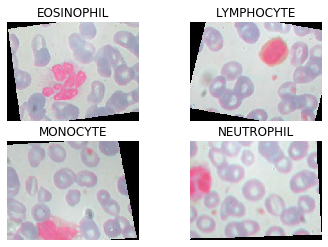

In [0]:
loc = []
loc.append('EOSINOPHIL/_0_207.jpeg')
loc.append('LYMPHOCYTE/_0_204.jpeg')
loc.append('MONOCYTE/_0_180.jpeg')
loc.append('NEUTROPHIL/_0_292.jpeg')

subplot = 221
for i in loc:
    plot_image(i, subplot)
    subplot += 1



In [0]:
from tqdm import tqdm
def get_data(folder):
    im = []
    labels = []
    for subtype in os.listdir(folder):
        if not subtype.startswith('.'):
            label = mappings[subtype]
        for img_name in tqdm(os.listdir(folder+subtype)):
            im.append(cv2.resize(cv2.imread(folder+subtype+'/'+img_name), (64,64)))
            labels.append(label)
    return np.asarray(im), np.asarray(labels)

In [0]:
train_im, train_labels = get_data(TRAIN)
test_im, test_labels = get_data(TEST)

100%|██████████| 620/620 [05:12<00:00,  1.34it/s]


In [0]:
class BloodDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        if self.transform:
            return self.transform(self.images[idx]), self.labels[idx]
        return self.images[idx], self.labels[idx]

In [0]:
tfms = transforms.Compose([transforms.ToTensor()])
train = BloodDataset(train_im, train_labels, transform=tfms)



mean = tuple((train_im.mean(axis=(0,1,2))/255).round(4))
std = tuple((train_im.std(axis=(0,1,2))/255).round(4))

tfms = transforms.Compose([transforms.ToTensor(),
                           transforms.Normalize(mean, std)])

train = BloodDataset(train_im, train_labels, transform=tfms)

pplus('Mean Values:',mean)
pplus('Std Dev',std)

------------------------------------
 Mean Values: (0.6606, 0.6414, 0.6787)
------------------------------------
------------------------------------
 Std Dev (0.2602, 0.2627, 0.2635)
------------------------------------


In [0]:
train.__getitem__(3)[0]

tensor([[[-2.4785, -2.5388, -2.4936,  ..., -2.5388, -2.5388, -2.5388],
         [-2.1319,  0.3850,  0.6111,  ..., -2.5388, -2.5388, -2.5388],
         [ 0.5056,  0.4302,  0.5056,  ..., -2.5388, -2.5388, -2.5388],
         ...,
         [-2.5388, -2.5388, -2.5388,  ..., -2.5388, -2.5388, -2.5388],
         [-2.5388, -2.5388, -2.4635,  ..., -2.5388, -2.5388, -2.5388],
         [-2.5388, -2.5388, -2.4032,  ..., -2.5388, -2.5388, -2.5388]],

        [[-2.3520, -2.4266, -2.3819,  ..., -2.4416, -2.4416, -2.4416],
         [-2.0385,  0.4843,  0.7082,  ..., -2.4416, -2.4416, -2.4416],
         [ 0.6037,  0.5291,  0.6037,  ..., -2.4416, -2.4416, -2.4416],
         ...,
         [-2.4416, -2.4416, -2.4266,  ..., -2.4416, -2.4416, -2.4416],
         [-2.4416, -2.4416, -2.3669,  ..., -2.4416, -2.4416, -2.4416],
         [-2.4416, -2.4416, -2.3371,  ..., -2.4416, -2.4416, -2.4416]],

        [[-2.4715, -2.5459, -2.5013,  ..., -2.5757, -2.5757, -2.5757],
         [-2.1590,  0.3562,  0.5794,  ..., -2

In [0]:
trainloader = DataLoader(train, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test, batch_size=test_size, shuffle=False)

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer0 = self.conv(3,32)
        self.block1 = Block(32)
        self.block2 = Block(64)
        self.block3 = Block(128)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256, 4)

    def conv(self, in_, out_): 
        return nn.Sequential(
            nn.Conv2d(in_, out_, 3, 1, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(out_))
        
    def forward(self, x):
        x = self.layer0(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.avgpool(x)
        x = x.view(-1, 256)
        x = self.fc(x)
        return x
# ----------------------------------------------------------------------------------------#
class Block(nn.Module):
    def __init__(self, in_):
        super().__init__()
        self.layer1 = self.conv_ds(in_, in_*2)
        self.layer2 = self.conv_ds(in_*2, in_*2)
        self.layer2_1 = self.conv_bn(in_*2, in_*2)
        
        self.layer1_1x1 = self.one_by_one(in_, in_*2)

    def one_by_one(self, in_, out_):
        return nn.Sequential(
            nn.Conv2d(in_, out_, 1, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(out_)
        )
    def conv_bn(self, in_, out_):
        return nn.Sequential(
            nn.Conv2d(in_, out_, 3, 2, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(out_))
    
    def conv_ds(self, in_, out_): 
        mid = round(in_ * 3/2)
        return nn.Sequential(
            nn.Conv2d(in_, mid, 1, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(mid),
            nn.Conv2d(mid, mid, 3, 1, 1, groups=mid, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(mid),
            nn.Conv2d(mid, out_, 1, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(out_))
    def forward(self, x):
        x = self.layer1(x) + self.layer1_1x1(x)
        x = self.layer2(x) + x
        x = self.layer2_1(x)
        return x

In [0]:
print(Network())
if not torch.cuda.is_available(): pplus('Turn ON your GPU')
net = Network()
net = net.cuda()

Network(
  (layer0): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block1): Block(
    (layer1): Sequential(
      (0): Conv2d(32, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
      (4): ReLU(inplace=True)
      (5): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (7): ReLU(inplace=True)
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (layer2): Sequential(
      (0): Conv2d(64, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
 

In [0]:


# optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.85, weight_decay=1e-4)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.CrossEntropyLoss()



In [0]:
def test(epoch):
    net.eval()
    test_loss = 0
    counter = 0
    accuracy = 0

    for batch_idx , (data,targets) in enumerate(testloader):

        data, targets = Variable(data).cuda(), Variable(targets).cuda()

        outputs = net(data)
        loss = criterion(outputs, targets)

        test_loss += loss.data.cpu().numpy().round(5)
        counter += 1

        _, predicted = torch.max(outputs.data,1)
        accuracy += (predicted == targets.data).sum()
        
        if batch_idx%(batch_size//10) == 0:
            pplus('Test Epoch:', epoch, batch_idx*len(data),'/',len(testloader.dataset),
                  '|\n Test Loss:',loss.data.cpu().numpy().round(5),
                  '|\n Accuracy:', (accuracy*100/(targets.data.size(0)*(batch_idx+1)))
                 )
    return test_loss/counter

In [0]:
def train(epoch):
    net.train()
    train_loss = 0
    counter = 0
    accuracy = 0
    for batch_idx, (data, targets) in enumerate(trainloader):
        data, targets = Variable(data).cuda(), Variable(targets).cuda()
        optimizer.zero_grad()
        outputs = net(data)
        loss = criterion(outputs, targets)
        train_loss += loss.data.cpu().numpy().round(5)
        counter += 1
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data,1)
        accuracy += (predicted == targets.data).sum()
        
        if batch_idx%(batch_size//10) == 0:
            pplus('Train Epoch:', epoch, batch_idx*len(data),'/',len(trainloader.dataset),
                  '|\n Train Loss:',loss.data.cpu().numpy().round(5),
                  '|\n Accuracy:', (accuracy*100/(targets.data.size(0)*(batch_idx+1)))
                 )
    return train_loss/counter

In [0]:
train_stack = []
test_stack = []

In [0]:
def plot_arrays(np_arr, np_arr2):
    plt.plot(np_arr)
    plt.plot(np_arr2)
    plt.xlabel('Epochs --->')
    plt.ylabel('Loss --->')
    plt.title('Training Curve')
    plt.show()

In [0]:
for i in range(200):
    train_stack.append(train(i))
    test_stack.append(test(i))
    plot_arrays(train_stack, test_stack)

------------------------------------
 Train Epoch: 0 0 / 9957 |
 Train Loss: 0.39991 |
 Accuracy: tensor(88, device='cuda:0')
------------------------------------
------------------------------------
 Train Epoch: 0 864 / 9957 |
 Train Loss: 0.33982 |
 Accuracy: tensor(91, device='cuda:0')
------------------------------------
------------------------------------
 Train Epoch: 0 1728 / 9957 |
 Train Loss: 0.2555 |
 Accuracy: tensor(92, device='cuda:0')
------------------------------------
------------------------------------
 Train Epoch: 0 2592 / 9957 |
 Train Loss: 0.18387 |
 Accuracy: tensor(92, device='cuda:0')
------------------------------------
------------------------------------
 Train Epoch: 0 3456 / 9957 |
 Train Loss: 0.14885 |
 Accuracy: tensor(93, device='cuda:0')
------------------------------------
------------------------------------
 Train Epoch: 0 4320 / 9957 |
 Train Loss: 0.23636 |
 Accuracy: tensor(93, device='cuda:0')
------------------------------------
---------

TypeError: ignored

In [0]:
diction = {'train_loss': train_stack, 'test_loss': test_stack}
df = pd.DataFrame(diction)
df.to_csv('log.csv')

ValueError: ignored

# Keras and Kaggle kernel

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPool2D, Input, Softmax, Activation, Flatten
from keras.models import Model
import os
import cv2
import scipy
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
DIR = "/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/images/"
TEST = "/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/images/TEST/"
TRAIN = "/content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/images/TRAIN/"

In [6]:
!cd /content/drive/My Drive/Colab Notebooks/datasets/dataset2-master/dataset2-master/
print(os.listdir(DIR))
#!mkdir ../output
#print(os.listdir("../output"))
!ls

/bin/bash: line 0: cd: too many arguments
['TEST', 'TEST_SIMPLE', 'TRAIN']
drive  sample_data


In [7]:
from tqdm import tqdm
from skimage.transform import resize
#import scipy.misc
#from PIL import Image

def get_data(folder):
    X = []
    y = []
    z = []
    
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 1
                label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3  
                label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4 
                label2 = 0
            else:
                label = 5
                label2 = 0
            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    #img_file = Image.fromarray(img_file).resize=(60, 80, 3)
                    #img_file = Image.resize()
                    img_file  = resize(img_file,(60,80,3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    z.append(label2)
    X = np.asarray(X)
    y = np.asarray(y)
    z = np.asarray(z)
    return X,y,z


X_train, y_train, z_train = get_data(TRAIN)
X_test, y_test, z_test = get_data(TEST)

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 5)
y_testHot = to_categorical(y_test, num_classes = 5)
z_trainHot = to_categorical(z_train, num_classes = 2)
z_testHot = to_categorical(z_test, num_classes = 2)
dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE'}
dict_characters2 = {0:'Mononuclear',1:'Polynuclear'}
print(dict_characters)
print(dict_characters2)

            

100%|██████████| 620/620 [08:29<00:00,  1.02it/s]

{1: 'NEUTROPHIL', 2: 'EOSINOPHIL', 3: 'MONOCYTE', 4: 'LYMPHOCYTE'}
{0: 'Mononuclear', 1: 'Polynuclear'}


In [8]:
print("Train X Shape --> ",X_train.shape)
print("Train y Shape --> ",y_trainHot.shape)
print("Train z Shape --> ",z_trainHot.shape)
##
# Input Layer (-1, 60, 80, 3) All three channel RGB
# Output Layer 1 (-1, 5) Softmax
# Output Layer 2 (-1, 2) Softmax (Doesn't work as 2nd output backpropogation messes all the weights)
##

Train X Shape -->  (9957, 60, 80, 3)
Train y Shape -->  (9957, 5)
Train z Shape -->  (9957, 2)


In [0]:
def keras_model():
    inp = Input(shape=(60,80,3))
    x = Conv2D(32, (11,11), padding="same",activation="relu")(inp)
    x = Conv2D(32, (7,7), padding="valid",activation="relu")(inp)
    x = MaxPool2D(pool_size=(2, 2))(x)
    #x = BatchNormalization()(x)
    #x = Dropout(0.5)(x)
    x = Conv2D(32, (5, 5), padding="same",activation="relu")(x)
    x = Conv2D(32, (5, 5), padding="valid",activation="relu")(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    #x = BatchNormalization()(x)
    #x = Dropout(0.5)(x)
    x = Conv2D(64, (3, 3), padding="same",activation="relu")(x)
    x = Conv2D(64, (3, 3), padding="valid",activation="relu")(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    #x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(1024,activation="relu")(x)
    x = Dropout(0.5)(x)
    y = Dense(5,activation="softmax")(x)
#    z = Dense(2,activation="softmax")(x)
    model = Model(inp, y)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


In [10]:
model = keras_model()
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 80, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 74, 32)        4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 37, 32)        25632     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 33, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 16, 32)        0      

In [11]:
filepath = "weight_tr5.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train,
         y_trainHot,
         epochs = 300,
         batch_size = 512,
         validation_data = (X_test,y_testHot),
         callbacks = callbacks_list,
         verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9957 samples, validate on 2487 samples
Epoch 1/300
9957/9957 [==============================] - 12s 1ms/step - loss: 1.3635 - acc: 0.3397 - val_loss: 2.0140 - val_acc: 0.2501

Epoch 00001: val_acc improved from -inf to 0.25010, saving model to weight_tr5.hdf5
Epoch 2/300
9957/9957 [==============================] - 3s 327us/step - loss: 1.1100 - acc: 0.4852 - val_loss: 3.6550 - val_acc: 0.2517

Epoch 00002: val_acc improved from 0.25010 to 0.25171, saving model to weight_tr5.hdf5
Epoch 3/300
9957/9957 [==============================] - 3s 326us/step - loss: 0.8455 - acc: 0.6343 - val_loss: 9.3661 - val_acc: 0.2497

Epoch 00003: val_acc did not improve from 0.25171
Epoch 4/300
9957/9957 [==============================] - 3s 325us/step - loss: 0.6862 - acc: 0.7098 - val_loss: 12.0979 - val_acc: 0.2493

Epoch 00004: val_acc did not improve from 0.25171
Epoch 5/300
9957/9957 [==========

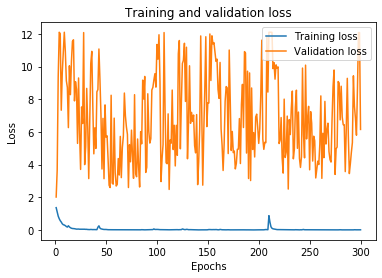

In [14]:
#print(history.history)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

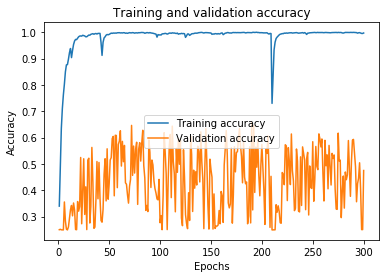

In [15]:
#Accuracy Plot
history_dict = history.history
history_dict.keys()
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model.load_weights(filepath)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagentrain = ImageDataGenerator(
        rotation_range=60,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
datagentrain.fit(X_train)

In [0]:
history = model.fit_generator(datagentrain.flow(X_train, y_trainHot, batch_size=32),
                    steps_per_epoch=1024,
                    epochs=200,
                    workers=4,
                    use_multiprocessing=True,validation_data = (X_test,y_testHot),
         callbacks = callbacks_list,)

Epoch 1/200
1024/1024 [==============================] - 46s 45ms/step - loss: 1.3990 - acc: 0.2825 - val_loss: 12.0805 - val_acc: 0.2505

Epoch 00001: val_acc did not improve from 0.65661
Epoch 2/200
1024/1024 [==============================] - 46s 44ms/step - loss: 1.3446 - acc: 0.3178 - val_loss: 12.0999 - val_acc: 0.2493

Epoch 00002: val_acc did not improve from 0.65661
Epoch 3/200
1024/1024 [==============================] - 45s 44ms/step - loss: 1.2167 - acc: 0.4106 - val_loss: 12.0999 - val_acc: 0.2493

Epoch 00003: val_acc did not improve from 0.65661
Epoch 4/200
 705/1024 [===================>..........] - ETA: 13s - loss: 1.1605 - acc: 0.4574

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
#Accuracy Plot
history_dict = history.history
history_dict.keys()
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()